### Tối ưu hàm Rosenbrock
Đầu vào:
- Hàm Rosenbrock: $f_x = \sum_{i = 1}^{D - 1}{[100(x_{i + 1} - x_i^2)^2 + (1 - x_i)^2]}$
- Số chiều: D
- $x_i \in [lower, upper]$ với $i = [1...D]$

Đầu ra: 
- Một lời giải $x = (x_1, x_2, ..., x_D)$
- Giá trị nhỏ nhất $f_x$

In [1]:
import numpy as np # type: ignore
import random
import copy
import matplotlib.pyplot as plt # type: ignore

In [2]:
class Problem:
    def __init__(self, D, LB, UB):
        self.D = D
        self.LB = LB
        self.UB = UB

In [3]:
def decode(chromosome, problem: Problem):
    x = chromosome * (problem.UB - problem.LB) + problem.LB
    return x

def get_fitness(x):
    # fx = np.sum(x**2)
    fx = np.sum(100 * (x[1:] - np.square(x[:-1]))**2 + (1 - np.square(x[:-1])))
    return -fx

In [4]:
class Individual:
    def __init__(self):
        self.chromosome = None
        self.fitness = None

    def genIndi(self, problem : Problem):
        self.chromosome = np.random.uniform(0.0, 1.0, problem.D)

    def cal_fitness(self, problem):
        sol = decode(self.chromosome, problem)
        self.fitness = get_fitness(sol)
    
    def clone(self):
        return copy.deepcopy(self)

    def __repr__(self):
        return f"chromosome={self.chromosome}, fitness={self.fitness}" 


In [5]:
def crossover(I_k, V_k, CR):
    O_k = Individual()
    O_k.chromosome = np.zeros(len(I_k.chromosome))
    j = np.random.randint(0, len(I_k.chromosome))
    for i in range(len(I_k.chromosome)):
        if np.random.rand() <= CR or i == j:
            O_k.chromosome[i] = V_k.chromosome[i]
        else:
            O_k.chromosome[i] = I_k.chromosome[i]
    O_k.chromosome = np.clip(O_k.chromosome, 0, 1)
    return O_k.clone()

def mutation(parent: list, F):
    V_k = Individual()
    a = np.zeros(len(parent[0].chromosome))
    b = np.zeros(len(parent[0].chromosome))

    for i in range(len(parent)):
        if i % 2:
            a += parent[i].chromosome
        else:
            b += parent[i].chromosome
            
    V_k.chromosome = parent[-1].chromosome + F * (a - b)
    V_k.chromosome = np.clip(V_k.chromosome, 0, 1)
    return V_k.clone()

In [6]:
class Population:
    def __init__(self, pop_size, problem : Problem):
        self.pop_size = pop_size
        self.list_indi = []
        self.problem = problem
    
    def genPop(self):
        for i in range(self.pop_size):
            indi = Individual()
            indi.genIndi(self.problem)
            indi.cal_fitness(self.problem)
            self.list_indi.append(indi)

    def __str__(self):
        result = f"pop_size = {self.pop_size}\n"
        result += "\n".join(str(indi) for indi in self.list_indi)
        return result

In [7]:
class Selection:
    @staticmethod
    def rand(pop: list, curr_index, y):
        indices = list(range(len(pop)))
        indices.remove(curr_index)
        res_index = random.sample(indices, 2 * y + 1)
        return [pop[i] for i in res_index]
    
    @staticmethod
    def best(pop: list, curr_index, y):
        indices = list(range(len(pop)))
        best_index = max(range(len(pop)), key=lambda i: pop[i].fitness)
        indices.remove(curr_index)
        if best_index != curr_index:
            indices.remove(best_index)
        res_index = random.sample(indices, 2 * y)
        res_index.append(best_index)
        return [pop[i] for i in res_index]
    
    @staticmethod
    def current_to_best(pop: list, curr_index, y):
        indices = list(range(len(pop)))
        best_index = max(range(len(pop)), key=lambda i: pop[i].fitness)
        indices.remove(curr_index)
        if best_index != curr_index:
            indices.remove(best_index)
        res_index = random.sample(indices, 2 * y)
        res_index.insert(0, curr_index)
        res_index.insert(0, best_index)
        res_index.append(curr_index)
        return [pop[i] for i in res_index]
    
        

In [8]:
def survival_selection(I_k, O_k):
    if I_k.fitness > O_k.fitness:
        return I_k.clone()
    else:
        return O_k.clone()

In [9]:
def DE(problem, pop_size, max_gen, F, CR):
    pop = Population(pop_size, problem)
    pop.genPop()
    history = []
    for i in range(max_gen):
        best = max(pop.list_indi, key=lambda indi: indi.fitness)
        for k, I_k in enumerate(pop.list_indi):
            parent = Selection.rand(pop.list_indi, k, 5)
            V_k = mutation(parent, F)
            O_k = crossover(V_k, I_k, CR)
            O_k.cal_fitness(problem)
            pop.list_indi[k] = survival_selection(I_k, O_k)
        history.append(best.fitness)
    solution = max(pop.list_indi, key=lambda indi: indi.fitness)
    return history, solution


In [10]:
# setup
D = 10
LB = -50
UB = 50
problem = Problem(D, LB, UB)

pop_size = 500
max_gen = 1000
F = 0.5 # [0.4, 0.9]
CR = 0.7 # [0.4, 0.7]

# start
fitness_history, solution = DE(problem, pop_size, max_gen, F, CR)

#show
for i in range(len(fitness_history)):
    print(f"Generation {i}, bestfitness = {fitness_history[i]:.2f}")


Generation 0, bestfitness = -98686234.04
Generation 1, bestfitness = -98686234.04
Generation 2, bestfitness = -68156890.00
Generation 3, bestfitness = -65504115.08
Generation 4, bestfitness = -65504115.08
Generation 5, bestfitness = -65504115.08
Generation 6, bestfitness = -42702334.44
Generation 7, bestfitness = -42702334.44
Generation 8, bestfitness = -42702334.44
Generation 9, bestfitness = -42702334.44
Generation 10, bestfitness = -41452412.07
Generation 11, bestfitness = -41452412.07
Generation 12, bestfitness = -41452412.07
Generation 13, bestfitness = -41452412.07
Generation 14, bestfitness = -41452412.07
Generation 15, bestfitness = -41452412.07
Generation 16, bestfitness = -41452412.07
Generation 17, bestfitness = -22516175.01
Generation 18, bestfitness = -22516175.01
Generation 19, bestfitness = -8261032.68
Generation 20, bestfitness = -8261032.68
Generation 21, bestfitness = -8261032.68
Generation 22, bestfitness = -8261032.68
Generation 23, bestfitness = -8261032.68
Generat

In [11]:
#show
np.set_printoptions(precision=2, suppress=True)
print("solution:")
print(decode(solution.chromosome, problem))
# print(solution.chromosome)
print(f"{solution.fitness:.2f}")

solution:
[ 5.14  3.41 -1.5   1.76  2.92  0.88 -1.58 -2.04 -6.07 34.29]
-89771.65


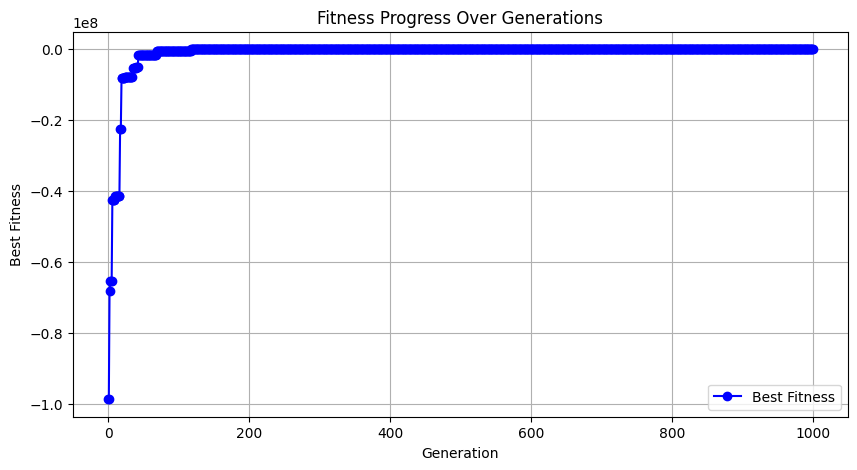

In [ ]:
generations = list(range(len(fitness_history)))
plt.figure(figsize=(10, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()